In [21]:
# 구글 드라이브의 폴더와 구글 코랩 폴더 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# 현재 경로 확인
!pwd

/content


In [23]:
# drive/My Drive/Colab Notebooks 경로로 변경
%cd drive/My\ Drive/Colab\ Notebooks\

/content/drive/My Drive/Colab Notebooks


## Tensorflow 6가지 방법 

```python 
1. tf.Module (meta class)
2. tf.keras.models.Model (multi input, output 가능)
3. tf.keras.models.Sequential 
4. subclass (tf.keras.models.Model)
5. tf.estimator 
6. tf.nn
```

## Data

```python
1. numpy 
2. tensor 
- tf.Tensor 
- tf.data.Dataset => ML용 dataset 데이터 셋을 가장 효율적으로 관리하고 하드웨어적으로 최적화 되어 사용할 수 있는 장점이 있다 
- tf.Variable 
```

## Data Pipelines

> 데이터의 흐름을 나타내는 것 <br>
> data load -> model training 

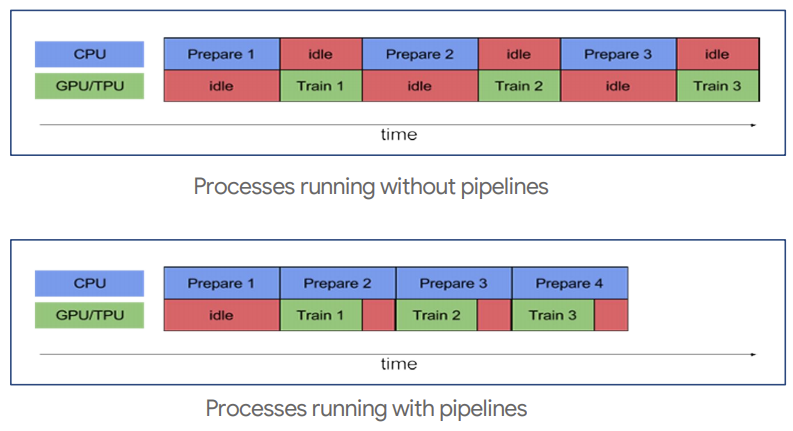

```
tf.data를 활용하여 data pipeline을 구축하면 하드웨어를 효율적으로 사용할 수 있다 
prefetch를 통해 gpu를 사용하여 데이터 학습 중일 때 데이터 로드시간을 줄이기 위해 cpu 연산을 하여 불러온다
병렬 연산, cache또한 지원한다 
```

In [4]:
import tensorflow as tf 
import pandas as pd

In [ ]:
pd.DataFrame.from_dict() # classmethod를 이용해서 dataset을 만든다 

In [18]:
x = tf.constant([[1,2],[3,4],[5,6]]) 
y = tf.constant([[1],[3],[5]]) 

In [6]:
x # 요소가 두 개인 데이터 3개

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

In [7]:
xx = tf.data.Dataset.from_tensor_slices(x) # lazy 기법을 사용해서 불러온다

In [8]:
for i in xx.take(2):
  print(i)

tf.Tensor([1 2], shape=(2,), dtype=int32)
tf.Tensor([3 4], shape=(2,), dtype=int32)


In [19]:
xx = tf.data.Dataset.from_tensor_slices((x,y)) # x,y 묶음으로 관리 가능 

In [20]:
for i, j in xx:
  print(i,j)

tf.Tensor([1 2], shape=(2,), dtype=int32) tf.Tensor([1], shape=(1,), dtype=int32)
tf.Tensor([3 4], shape=(2,), dtype=int32) tf.Tensor([3], shape=(1,), dtype=int32)
tf.Tensor([5 6], shape=(2,), dtype=int32) tf.Tensor([5], shape=(1,), dtype=int32)


In [21]:
xx.cache().prefetch(32).shuffle(32)

<ShuffleDataset shapes: ((2,), (1,)), types: (tf.int32, tf.int32)>

In [10]:
xx = tf.data.Dataset.from_tensors(x) # 전체 데이터 

In [15]:
for i in xx.take(1):
  print(i)

tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32)


## Data Augmentation

```python
augmentation 방법 두 가지 
1. 원본을 array로 바꾸고 나서 array를 augmentation
2. 원본 자체를 augmentation (이미지 파일 처리) 
```

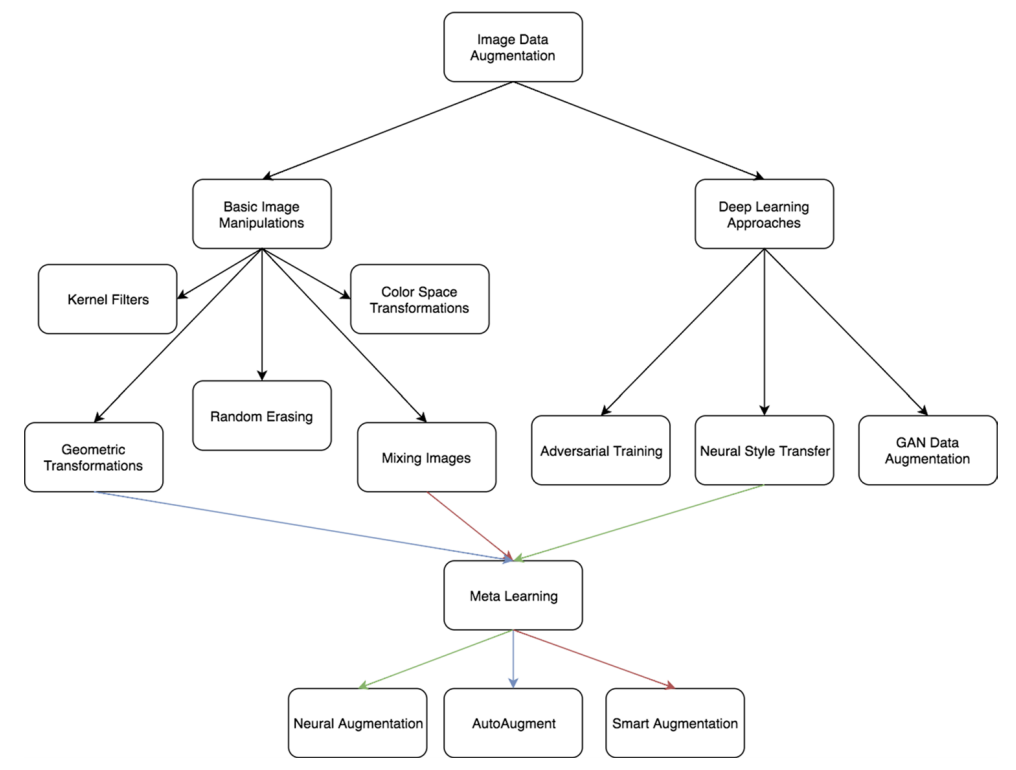

```
1. Basic image manipulation 
- overfitting 방지하는 방식 
- 원본 자체를 augmentation을 하지 않는다 (성능향상에 도움이 되는 방법이 아니다) 
2. Deep learning approaches 
- 원본 자체를 augmentation하는 방법 
- 그럴듯한 가짜 데이터를 생성하는 방법은 일반적인 성능을 높일 수 있다 
```

## 데이터 관리 방식

```python
1. Directory 
2. DB(LMDB) 
- 불러오는 리소스가 크기 때문에 잘 사용하지 않는 관리 방법이다 
- LMDB를 사용해서 이미지를 DB에 저장하는 방식도 있지만 요즘에는 잘 사용하지 않는다 
3. HDF 
```

## 데이터를 불러오는 방법 

```python
1. tf.keras.preprocessing.image_dataset_from_directory
2. tf.keras.preprocessing.image.ImageDataGenerator().flow_from_directory
3. pathlib.Path.glob
4. tf.data.Dataset.list_files
5. tf.data.Dataset.from_generator
```

In [26]:
data = tf.keras.preprocessing.image_dataset_from_directory('flower_photos/') # directory에 있는 모든 이미지를 불러온다 

Found 3670 files belonging to 5 classes.


In [27]:
data # tf.data.Dataset이기 때문에 map을 이용해서 전처리가 가능하다 

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [34]:
next(iter(data))

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
 array([[[[1.64000000e+02, 1.60000000e+02, 1.48000000e+02],
          [1.64000000e+02, 1.60000000e+02, 1.48000000e+02],
          [1.65000000e+02, 1.61000000e+02, 1.49000000e+02],
          ...,
          [1.38000000e+02, 1.41000000e+02, 1.22000000e+02],
          [1.39000000e+02, 1.40000000e+02, 1.22000000e+02],
          [1.38000000e+02, 1.39000000e+02, 1.21000000e+02]],
 
         [[1.64000000e+02, 1.60000000e+02, 1.48000000e+02],
          [1.64000000e+02, 1.60000000e+02, 1.48000000e+02],
          [1.65000000e+02, 1.61000000e+02, 1.49000000e+02],
          ...,
          [1.38168228e+02, 1.41168228e+02, 1.22168228e+02],
          [1.39000000e+02, 1.40000000e+02, 1.22000000e+02],
          [1.38209427e+02, 1.39209427e+02, 1.21209427e+02]],
 
         [[1.64000000e+02, 1.60732422e+02, 1.46535156e+02],
          [1.64000000e+02, 1.60732422e+02, 1.46535156e+02],
          [1.65000000e+02, 1.61732422e+02, 1.47535156e+02],
    

In [26]:
idg = tf.keras.preprocessing.image.ImageDataGenerator() # augmentation을 함 
data2 = idg.flow_from_directory('flower_photos/')

Found 3670 images belonging to 5 classes.


In [ ]:
idg.flow_from_dataframe() 

In [31]:
next(data2)

(array([[[[ 63.,  73.,  39.],
          [ 63.,  73.,  39.],
          [ 63.,  73.,  39.],
          ...,
          [ 78.,  89.,  21.],
          [ 77.,  88.,  20.],
          [ 77.,  88.,  20.]],
 
         [[ 64.,  74.,  40.],
          [ 64.,  74.,  40.],
          [ 64.,  74.,  40.],
          ...,
          [ 77.,  88.,  20.],
          [ 77.,  88.,  20.],
          [ 77.,  88.,  20.]],
 
         [[ 66.,  76.,  42.],
          [ 65.,  75.,  41.],
          [ 65.,  75.,  41.],
          ...,
          [ 77.,  88.,  20.],
          [ 77.,  88.,  20.],
          [ 77.,  88.,  20.]],
 
         ...,
 
         [[176., 181.,  37.],
          [176., 181.,  37.],
          [175., 180.,  36.],
          ...,
          [ 36.,  44.,  21.],
          [ 35.,  43.,  19.],
          [ 35.,  43.,  19.]],
 
         [[174., 182.,  37.],
          [173., 181.,  36.],
          [172., 179.,  37.],
          ...,
          [ 36.,  44.,  21.],
          [ 35.,  43.,  19.],
          [ 35.,  43.,  19.

In [35]:
tf.data.Dataset.from_generator

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.from_generator>

In [3]:
import pathlib

In [41]:
flower_path = pathlib.Path('flower_photos')

In [42]:
for i in flower_path.glob('*/*.jpg'):
  print(i)

flower_photos/dandelion/8915661673_9a1cdc3755_m.jpg
flower_photos/dandelion/8740218495_23858355d8_n.jpg
flower_photos/dandelion/2608937632_cfd93bc7cd.jpg
flower_photos/dandelion/4510350093_3700064215.jpg
flower_photos/dandelion/8737699225_19e0c9f0fa_m.jpg
flower_photos/dandelion/3539077354_c67aa7168d_m.jpg
flower_photos/dandelion/8220011556_28e0cab67f.jpg
flower_photos/dandelion/4571923094_b9cefa9438_n.jpg
flower_photos/dandelion/2521827947_9d237779bb_n.jpg
flower_photos/dandelion/5676682203_70d797f760.jpg
flower_photos/dandelion/2535727910_769c020c0d_n.jpg
flower_photos/dandelion/3487229452_73e3004858.jpg
flower_photos/dandelion/2674176237_e265ea64cc_n.jpg
flower_photos/dandelion/14060367700_fe87e99b6a_m.jpg
flower_photos/dandelion/8754822932_948afc7cef.jpg
flower_photos/dandelion/18999743619_cec3f39bee.jpg
flower_photos/dandelion/8691437509_9ac8441db7_n.jpg
flower_photos/dandelion/14914603395_b271ffab56_n.jpg
flower_photos/dandelion/6888894675_524a6accab_n.jpg
flower_photos/dandelion

In [44]:
ls = tf.data.Dataset.list_files('flower_photos/*/*.jpg')  # 파일 명을 불러온다 

In [43]:
import matplotlib.pyplot as plt

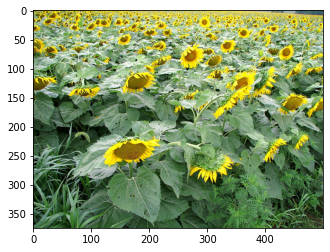

In [50]:
for i in ls.take(100):
  x = tf.keras.preprocessing.image.load_img(i.numpy())
  plt.imshow(x)

In [52]:
!pip install Augmentor

In [2]:
import Augmentor

In [54]:
pipe = Augmentor.Pipeline('augmentor/')

Initialised with 2 image(s) found.
Output directory set to augmentor/output.

In [59]:
pipe.rotate(0.5,15,15)

In [60]:
pipe.sample(5) # 랜덤하게 n개 뽑아서 처리한다 

Processing <PIL.Image.Image image mode=RGB size=180x240 at 0x7F12D53BD910>: 100%|██████████| 5/5 [00:00<00:00, 68.30 Samples/s]


In [61]:
pipe.process()

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x240 at 0x7F12D53B9710>: 100%|██████████| 2/2 [00:00<00:00, 49.80 Samples/s]


In [62]:
pipe.rotate(1,15,15) 

In [63]:
pipe.flip_left_right(0.5) # 0.5확률로 좌우 반전한다

In [64]:
pipe.process() # 전부다 처리한다 

Processing <PIL.Image.Image image mode=RGB size=320x240 at 0x7F12D5FF76D0>: 100%|██████████| 2/2 [00:00<00:00, 30.33 Samples/s]


In [65]:
g = pipe.keras_generator(2)

In [ ]:
tf.data.Dataset.from_generator # 내부적으로 PIL로 만들어졌다 

In [66]:
next(g)

(array([[[[0.        , 0.        , 0.        ],
          [0.67058825, 0.5803922 , 0.3529412 ],
          [0.5254902 , 0.54901963, 0.34509805],
          ...,
          [0.7294118 , 0.69411767, 0.62352943],
          [0.7647059 , 0.7019608 , 0.6745098 ],
          [0.7176471 , 0.6117647 , 0.6666667 ]],
 
         [[0.        , 0.        , 0.        ],
          [0.6039216 , 0.56078434, 0.22745098],
          [0.3764706 , 0.45490196, 0.15294118],
          ...,
          [0.7254902 , 0.6666667 , 0.6117647 ],
          [0.7607843 , 0.69411767, 0.67058825],
          [0.7294118 , 0.61960787, 0.6784314 ]],
 
         [[0.        , 0.        , 0.        ],
          [0.6156863 , 0.57254905, 0.2       ],
          [0.29411766, 0.3882353 , 0.03529412],
          ...,
          [0.7254902 , 0.6431373 , 0.6156863 ],
          [0.7490196 , 0.6901961 , 0.6627451 ],
          [0.7411765 , 0.64705884, 0.6901961 ]],
 
         ...,
 
         [[0.1882353 , 0.07843138, 0.08627451],
          [0.18431

In [ ]:
!pip install -U albumentations

In [ ]:
!pip install -U tensorflow-datasets

In [1]:
import tensorflow_datasets as tfds

In [11]:
flowers, info = tfds.load('tf_flowers', split='train', as_supervised=True, with_info=True)

In [7]:
flowers # as_supervised=False

<PrefetchDataset shapes: {image: (None, None, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>

In [9]:
flowers # as_supervised=True

<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [13]:
info

tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_path='/root/tensorflow_datasets/tf_flowers/3.0.1',
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)

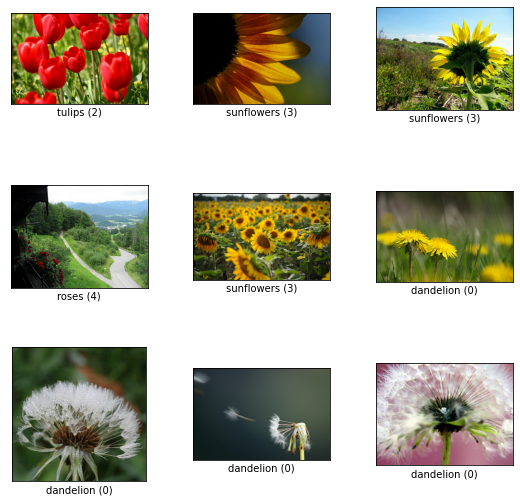

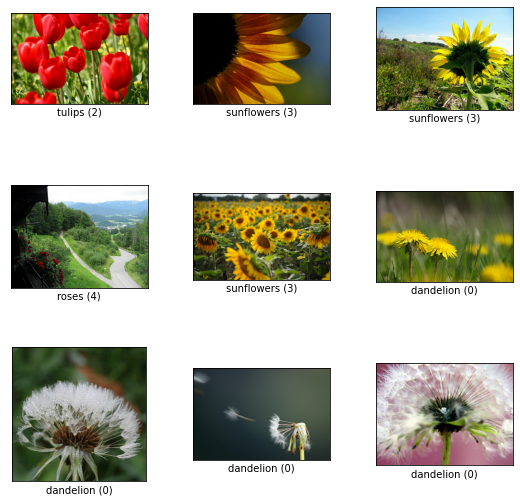

In [15]:
tfds.visualization.show_examples(flowers, info)

In [16]:
flowers_pd = tfds.as_dataframe(flowers,info) # pandas data / eda 쉽게 하기 위해 

In [17]:
flowers_pd

In [31]:
data, metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True
)

In [32]:
data

[<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>,
 <PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>,
 <PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>]

In [33]:
metadata

tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_path='/root/tensorflow_datasets/tf_flowers/3.0.1',
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)

In [35]:
metadata.features['image']

Image(shape=(None, None, 3), dtype=tf.uint8)

In [36]:
metadata.features['label']

ClassLabel(shape=(), dtype=tf.int64, num_classes=5)

In [37]:
metadata.features['label'].int2str(0)

'dandelion'

In [ ]:
tf.keras.layers.experimental.preprocessing.RandomCrop
tf.keras.layers.RandomCrop
# model 안에서 함께 사용 가능하다 (preprocessing layer) => map이랑 같이 쓸수 있다 

In [39]:
import numpy as np
im = tf.keras.preprocessing.image.load_img('people.jpg')

In [40]:
x = np.array(im)

In [41]:
xx = tf.keras.layers.RandomRotation(0.4)(x)

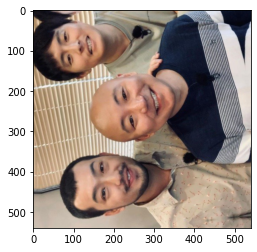

In [44]:
plt.imshow(xx)

In [48]:
xx = tf.keras.layers.RandomFlip()(x)

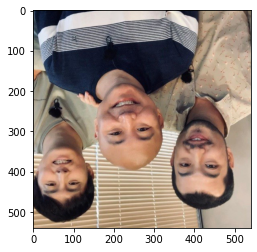

In [49]:
plt.imshow(xx)

In [54]:
aug = tf.keras.models.Sequential([
  tf.keras.layers.RandomRotation(0.5),s
  tf.keras.layers.RandomFlip()
]) # Model보다 Sequential이 좋은 점은 다른 모델안에도 들어갈수 있다는 점이다 (전처리 레이어를 사용할 때 명확하게 확인 가능하다)

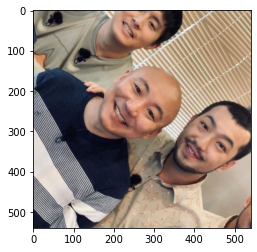

In [55]:
plt.imshow(aug(x))

In [59]:
# Model안에 Sequential 전처리 Layer 포함된 예시 
model = tf.keras.models.Model([
  aug, 
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
]) # 전처리 자체가 모델 안에 들어가기 때문에 gpu로 전처리가 가능하다 

In [ ]:
tf.image.random_crop # 하나씩 처리 

In [74]:
from albumentations import Compose, RandomBrightnessContrast, HorizontalFlip

In [75]:
aug = Compose([RandomBrightnessContrast(), HorizontalFlip()])

In [76]:
aug

Compose([
  RandomBrightnessContrast(always_apply=False, p=0.5, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), brightness_by_max=True),
  HorizontalFlip(always_apply=False, p=0.5),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})

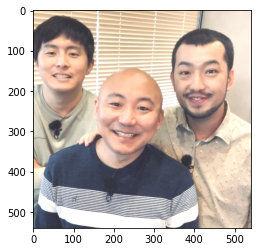

In [77]:
plt.imshow(aug(image=x)['image'])